In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('kingage_with_date.csv', index_col = 0)
data

,age
date,
1981-01-01,60
1982-01-01,43
1983-01-01,67
1984-01-01,50
1985-01-01,56
1986-01-01,42
1987-01-01,50
1988-01-01,65
1989-01-01,68


## 1. 모형 식별

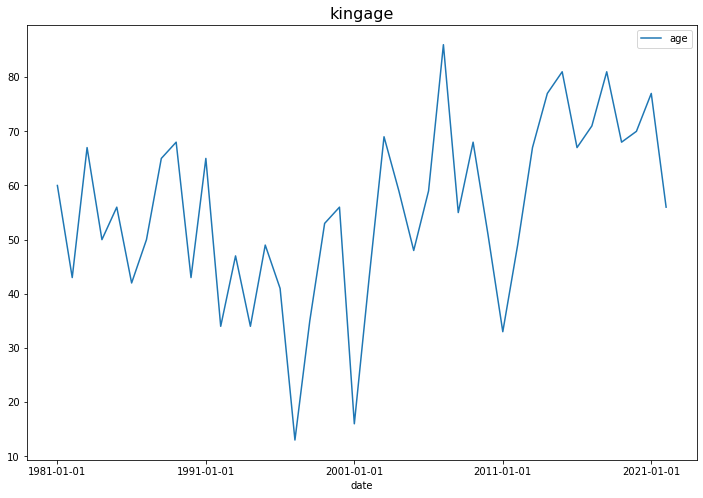

In [2]:
##time series plot
data.plot(figsize=[12, 8])
plt.title('kingage', fontsize=16) 
plt.show()

In [3]:
## UDF for KPSS test 
from statsmodels.tsa.stattools import kpss 
import pandas as pd 
def kpss_test(timeseries): 
    print("Results of KPSS Test:") 
    kpsstest = kpss(timeseries, regression="c", nlags="auto") 
    kpss_output = pd.Series( 
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"] ) 
    for key, value in kpsstest[3].items(): 
        kpss_output["Critical Value (%s)" % key] = value 
    print(kpss_output)

In [4]:
## 귀무가설 (H0): 정상 시계열이다
## 대립가설 (H1): 정상 시계열이 아니다 <-- p-value 0.04

kpss_test(data)

Results of KPSS Test:
Test Statistic           0.491314
p-value                  0.043623
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


KPSS 검정을 통해서 확인해봐도 p-value가 0.04 이므로 유의수준 5% 하에서 귀무가설 (H0: 정상 시계열이다)을 기각하고, 대립가설(H1: 정상 시계열이 아니다)을 채택합니다. 


#### 분산이 고정적이지 않은 경우 분산 안정화 변환 (variance stabilizing transformation, VST)
자연로그를 취해서 로그 변환을 해주었습니다. 

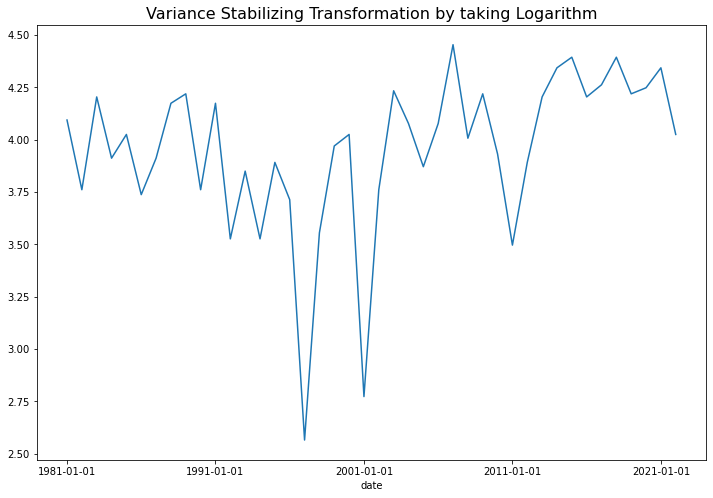

In [5]:
data = np.log(data.age)
data.plot(figsize=(12, 8)) 
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16) 
plt.show()

#### 추세가 있는 경우 차분을 통한 추세 제거 (de-trend by differencing)

차분(differencing)은 현재의 시계열 값에서 시차 t 만큼의 이전 값을 빼주는 것입니다. 

1차 차분 = Delta1_Z(t) = Z(t) - Z(t-1) 

2차 차분 = Delta2_Z(t) = Z(t) - Z(t-1) - (Z(t-1) - Z(t-2)) =  Z(t) - 2Z(t-1) + Z(t-2)

Python의 diff() 메소드를 사용해서 차분을 해줄 수 있습니다. 이때 차분의 차수 만큼 결측값이 생기는 데요, dropna() 메소드를 사용해서 결측값은 제거해주었습니다. 

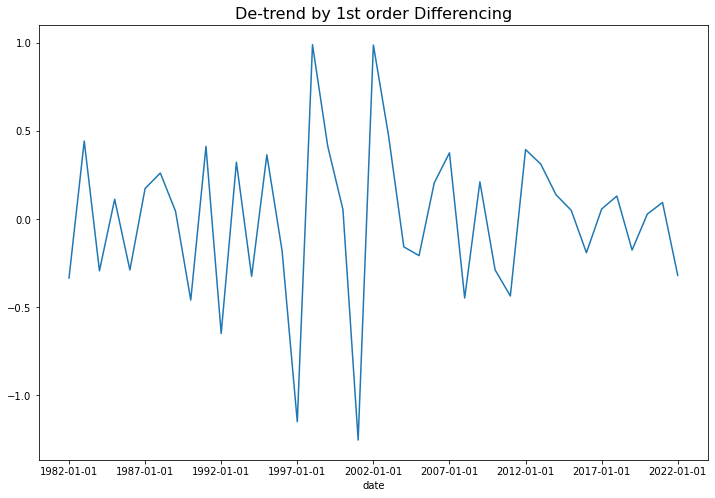

In [7]:
## De-trend by Differencing 
data_diff1 = data.diff(1).dropna() 
data_diff1.plot(figsize=(12, 8)) 
plt.title("De-trend by 1st order Differencing", fontsize=16) 
plt.show()

#### 계절성이 있는 경우 계절 차분을 통한 계절성 제거 (de-seasonality by seaanl differencing)
 

아직 남아있는 계절성(seasonality)을 계절 차분(seasonal differencing)을 사용해서 제거해보겠습니다. 1년 12개월 주기의 계절성을 띠고 있으므로 diff(12) 함수로 계절 차분을 실시하고, 12개의 결측값이 생기는데요 dropna() 로 결측값은 제거해주었습니다. 


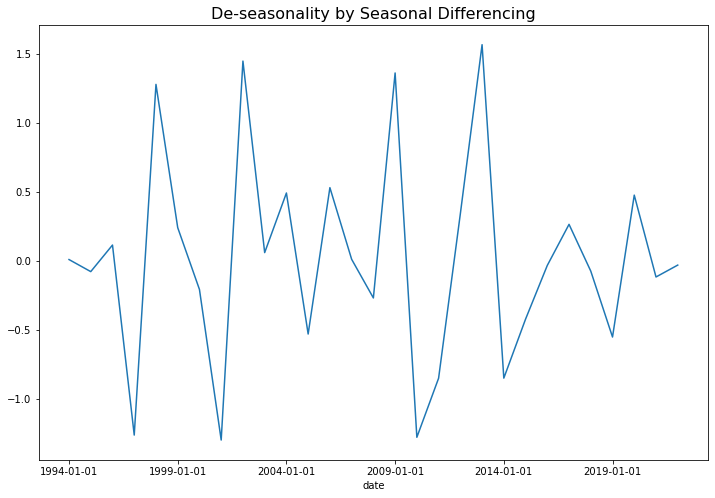

In [8]:
## Stationary Process: De-seasonality by Seasonal Differencing 
data_diff1_diff12 = data_diff1.diff(12).dropna() 
## plotting 
data_diff1_diff12.plot(figsize=(12, 8)) 
plt.title("De-seasonality by Seasonal Differencing", fontsize=16) 
plt.show()

In [29]:
## 귀무가설 (H0): 정상 시계열이다 <-- p-value 0.10 
## 대립가설 (H1): 정상 시계열이 아니다
kpss_test(data_diff1_diff12)

Results of KPSS Test:
Test Statistic            0.268264
p-value                   0.100000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


위의 시도표를 보면 이제 계절성도 제거가 되어서 정상 시계열처럼 보입니다. 아래에 KPSS 검정을 해보니 p-value 가 0.10 으로서, 유의수준 5% 하에서 귀무가설(H0: 정상 시계열이다)을 채택할 수 있습니다.


In [34]:
data_diff1_diff12

date
1994-01-01    0.009357
1995-01-01   -0.078033
1996-01-01    0.114421
1997-01-01   -1.261951
1998-01-01    1.278081
1999-01-01    0.240590
2000-01-01   -0.207304
2001-01-01   -1.297883
2002-01-01    1.446919
2003-01-01    0.059719
2004-01-01    0.491458
2005-01-01   -0.530124
2006-01-01    0.530124
2007-01-01    0.011350
2008-01-01   -0.268766
2009-01-01    1.360797
2010-01-01   -1.278081
2011-01-01   -0.850262
2012-01-01    0.340253
2013-01-01    1.565635
2014-01-01   -0.849499
2015-01-01   -0.422263
2016-01-01   -0.033187
2017-01-01    0.264324
2018-01-01   -0.074567
2019-01-01   -0.551751
2020-01-01    0.476002
2021-01-01   -0.116864
2022-01-01   -0.030772
Name: age, dtype: float64

#### 정상성을 만족하는 차분된 데이터로 ACF와 PACF를 그려 ARIMA 모형의 p와 q를 결정합니다

In [10]:
import statsmodels.api as sm
sm.tsa.stattools.acf(data_diff1_diff12, nlags=10, fft=False)

array([ 1.        , -0.34235937, -0.24265095, -0.15154833,  0.45414572,
       -0.13618259, -0.09172269,  0.10013589, -0.14729949,  0.02250866,
        0.03515387])

In [11]:
sm.tsa.stattools.pacf(data_diff1_diff12, nlags=10, method='ywm')

array([ 1.        , -0.34235937, -0.40764039, -0.55433772, -0.01304947,
       -0.11029384, -0.01494586,  0.35141824, -0.18406653, -0.10977378,
       -0.14940026])

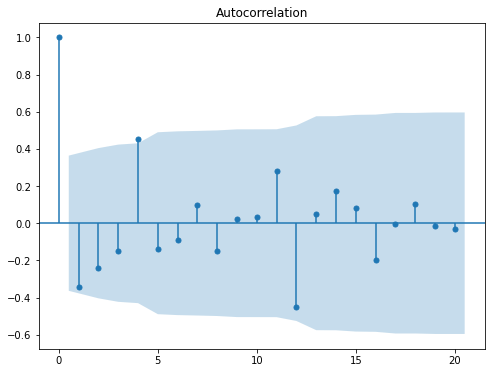

In [12]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_acf(data_diff1_diff12, lags=20, ax=ax)
plt.show()

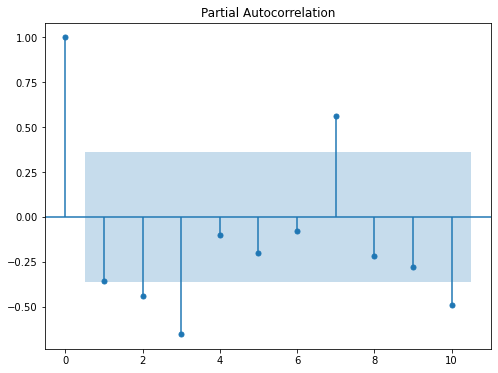

In [13]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_pacf(data_diff1_diff12, lags=10, ax=ax)
plt.show()

## 2. 모수 추정

In [14]:
##가능한 모든 (p,d,q) 값을 돌려보고 가장 높은 정확도를 주는 쌍을 찾기 -> AIC 값이 가장 작은 것 찾기
from statsmodels.tsa.arima_model import ARIMA
import itertools
import warnings 
warnings.filterwarnings('ignore')
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
for param in pdq:
    try:
        model_arima=ARIMA(data_diff1_diff12,order=param)
        model_arima_fit=model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 69.58546572718072
(0, 0, 1) 59.50975666811152
(0, 0, 2) 60.40280497662252
(0, 0, 3) 62.33852027979111
(0, 1, 0) 95.95739036859686
(0, 1, 1) 73.65434809785415
(0, 1, 2) 64.97026007361958
(0, 1, 3) nan
(0, 2, 0) 123.97674688738657
(0, 2, 1) 98.98718682157889
(0, 2, 2) 81.87962229087817
(0, 2, 3) 75.32930726724834
(1, 0, 0) 68.08996290781607
(1, 0, 1) 60.62860556510606
(1, 0, 2) 62.37024902594283
(1, 0, 3) 62.86213214697914
(1, 0, 4) 59.3715878134234
(1, 1, 0) 88.74457224648249
(1, 2, 0) 110.02261972314014
(2, 0, 0) 65.14463798342727
(2, 0, 1) 61.160705699204314
(2, 0, 2) 60.81338574384999
(2, 0, 3) 60.35798858486098
(2, 0, 4) 60.84287396199079
(2, 1, 0) 86.15716349329306
(2, 1, 1) 70.61517138308736
(2, 2, 0) 107.61707504363301
(2, 2, 3) 84.20142543862076
(3, 0, 0) 57.4159287642804
(3, 0, 1) 59.41525151124171
(3, 0, 2) 61.254432470581925
(3, 0, 3) 62.23164300965237
(3, 0, 4) 62.68473372954388
(3, 1, 0) 70.91987652329851
(3, 1, 1) 63.71507493359552
(3, 1, 2) 65.71428736750866
(3,

#### (3,0,0), (0,0,1), (1,0,4) 쌍이 제일 AIC가 낮다

## 3. 모형 적합성 진단

In [20]:
from statsmodels.tsa.arima_model import ARIMAResults

model=ARIMA(data_diff1_diff12, order=(1,0,4))
model_fit=model.fit(trend='nc', full_output=True, disp=0)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    age   No. Observations:                   29
Model:                     ARMA(1, 4)   Log Likelihood                 -22.688
Method:                       css-mle   S.D. of innovations              0.483
Date:                Tue, 01 Mar 2022   AIC                             57.376
Time:                        22:57:51   BIC                             65.580
Sample:                    01-01-1994   HQIC                            59.945
                         - 01-01-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.age     -0.6274      0.168     -3.726      0.000      -0.957      -0.297
ma.L1.age      0.1911        nan        nan        nan         nan         nan
ma.L2.age     -0.6305      0.150     -4.191      0.000      -0.925      -0.336
ma.L3.age     -0.2796        nan        nan        nan         nan         nan
ma.L4.age      0.7110        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5939           +0.0000j            1.5939            0.5000
MA.1           -0.8143           -0.5804j            1.0000           -0.4015
MA.2           -0.8143           +0.5804j            1.0000            0.4015
MA.3            1.0110           -0.6200j            1.1860           -0.0875
MA.4            1.0110           +0.6200j            1.1860            0.0875
-----------------------------------------------------------------------------
"""

ARIMA(1,0,4) 모델에 대해 각 변수에 대한 p-value를 보면 상수항의 p-value가 높아 유의미하지 않다는 것을 알 수 있었다. 따라서 모델을 fitting할 때 trend = 'nc'로 해두는 것이 적절했습니다.

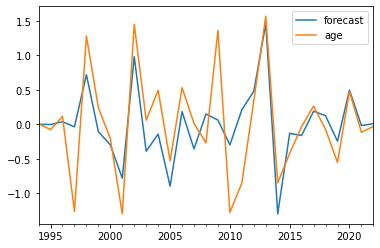

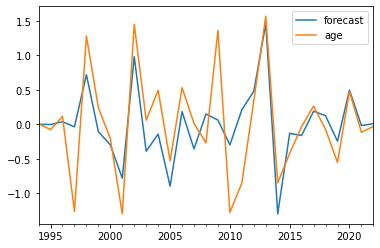

In [21]:
##(1,0,4) model
model_fit.plot_predict()

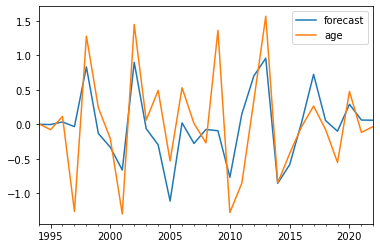

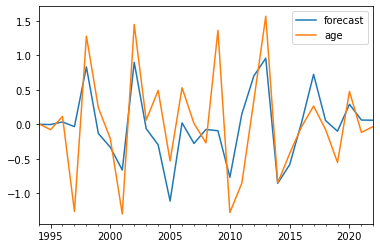

In [22]:
model=ARIMA(data_diff1_diff12, order=(3,0,0))
model_fit=model.fit(trend='nc', full_output=True, disp=0)
model_fit.plot_predict()

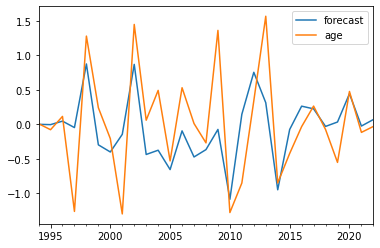

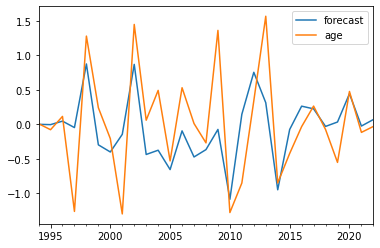

In [23]:
model=ARIMA(data_diff1_diff12, order=(0,0,1))
model_fit=model.fit(trend='nc', full_output=True, disp=0)
model_fit.plot_predict()

(3,0,0), (0,0,1), (1,0,4) 세개의 쌍에 대해 그래프를 그려본 결과, (1,0,4) 쌍이 가장 잘 예측함을 알 수 있었습니다

## 4. 모형 확정 및 예측 (예측값 17개 출력하기)

In [36]:
model=ARIMA(data_diff1_diff12, order=(1,0,4))
model_fit=model.fit(trend='nc', full_output=True, disp=0)
fcast=model_fit.predict(12)
fcast

2006-01-01    0.183177
2007-01-01   -0.357392
2008-01-01    0.149379
2009-01-01    0.060766
2010-01-01   -0.299336
2011-01-01    0.209495
2012-01-01    0.478526
2013-01-01    1.457992
2014-01-01   -1.299417
2015-01-01   -0.132381
2016-01-01   -0.162416
2017-01-01    0.188963
2018-01-01    0.123836
2019-01-01   -0.246148
2020-01-01    0.495084
2021-01-01   -0.018326
2022-01-01    0.008876
Freq: AS-JAN, dtype: float64

In [41]:
fcast=model_fit.forecast(17)
fcast

(array([-1.38089591e-01,  1.25619492e-01, -1.37784407e-01,  5.82545454e-02,
        -3.65479128e-02,  2.29295401e-02, -1.43856042e-02,  9.02528383e-03,
        -5.66230986e-03,  3.55243708e-03, -2.22873871e-03,  1.39827283e-03,
        -8.77252637e-04,  5.50373411e-04, -3.45294935e-04,  2.16632180e-04,
        -1.35911352e-04]),
 array([0.48317827, 0.52716647, 0.55462933, 0.55528502, 0.6620215 ,
        0.69958169, 0.71382389, 0.71935242, 0.72151689, 0.72236706,
        0.72270142, 0.72283299, 0.72288477, 0.72290515, 0.72291317,
        0.72291633, 0.72291757]),
 array([[-1.0851016 ,  0.80892242],
        [-0.9076078 ,  1.15884678],
        [-1.22483792,  0.9492691 ],
        [-1.03008409,  1.14659319],
        [-1.33408621,  1.26099039],
        [-1.34822538,  1.39408446],
        [-1.41345472,  1.38468351],
        [-1.40087956,  1.41893013],
        [-1.41980942,  1.4084848 ],
        [-1.41226099,  1.41936586],
        [-1.4186975 ,  1.41424002],
        [-1.41532835,  1.4181249 ],